In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/100-largest-companies/Largest_Companies.csv


In [2]:
# importing the matplotlib and seaborn libraries for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# loading the dataset into a pandas dataframe
url = '/kaggle/input/100-largest-companies/Largest_Companies.csv'
df = pd.read_csv(url)

In [4]:
# displays five random rows in the dataframe
df.sample(5)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
86,87,Delta Air Lines,Airline,"50,582",69.2%,"95,000","Atlanta, Georgia"
72,73,New York Life Insurance Company,Insurance,"58,445",14.2%,"15,050","New York City, New York"
67,68,HCA Healthcare,Healthcare,"60,233",2.5%,"250,500","Nashville, Tennessee"
65,66,TD Synnex,Infotech,"62,344",97.2%,"28,500","Clearwater, Florida"
92,93,Performance Food Group,Food Processing,"47,194",61.6%,"34,825","Richmond, Virginia"


In [5]:
# displays the number of rows and columns in the dataframe
df.shape

(100, 7)

In [6]:
# displays column name, datatypes, non-null values count and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


# Data Cleaning

In [7]:
# using the 'Rank' column as index of the dataframe
df = df.set_index('Rank')

# Removing the comma to enable conversion to float dtype
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype('float64')
df['Revenue (USD billions)'] = (df['Revenue (USD millions)']/1000)
df = df.drop('Revenue (USD millions)', axis=1)

# Removing the comma to enable conversion to integer dtype
df['Employees'] = df['Employees'].str.replace(',', '').astype('Int64')

# splitting the 'Headquarters' column to two new columns
df[['Headquarters_city','Headquarters_state']] = (df['Headquarters'].str.split(',', n=1,expand=True))
df = df.drop('Headquarters',axis=1) # dropping the 'Headquarters' column

# Removing the '%' sign in the 'Revenue growth' column, to enable conversion to 'float64' dtype
df['Revenue_growth(%)'] = (df['Revenue growth'].str.strip('%').astype('float64'))
df = df.drop('Revenue growth', axis=1)  

In [8]:
# displays five random rows in the dataframe, this is to ensure that the dataframe is ready for visualization
df.sample(5)

,Name,Industry,Employees,Revenue (USD billions),Headquarters_city,Headquarters_state,Revenue_growth(%)
Rank,,,,,,,
15,Cigna,Health Insurance,70231,180.516,Bloomfield,Connecticut,3.7
58,Bunge Limited,Food industry,23000,67.232,White Plains,New York,13.7
55,MetLife,Financials,45000,69.898,New York City,New York,1.7
8,Alphabet,Technology,156000,282.836,Mountain View,California,9.8
76,Plains All American Pipeline,Petroleum industry,4100,57.342,Houston,Texas,36.3


In [9]:
# displays statistical summary of numerical columns in the dataframe
df.describe()

,Employees,Revenue (USD billions),Revenue_growth(%)
count,100.0,100.000000,100.000000
mean,168030.07,117.566460,19.576000
std,271749.30091,100.915112,21.463397
min,305.0,44.200000,0.500000
25%,44711.5,57.876000,4.375000
50%,89638.5,80.824500,11.700000
75%,196512.5,138.763000,23.625000
max,2100000.0,611.289000,97.200000


In [10]:
# checking if our dtype conversions has been effected
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    100 non-null    object 
 1   Industry                100 non-null    object 
 2   Employees               100 non-null    Int64  
 3   Revenue (USD billions)  100 non-null    float64
 4   Headquarters_city       100 non-null    object 
 5   Headquarters_state      100 non-null    object 
 6   Revenue_growth(%)       100 non-null    float64
dtypes: Int64(1), float64(2), object(4)
memory usage: 6.3+ KB


# Data Visualization

In [11]:
top_8 = df['Headquarters_state'].value_counts().index[:8]
def generalize_top8(val):
    if val in top_8:
        return val
    else:
        return 'Other'

In [12]:
state = df['Headquarters_state'].apply(generalize_top8)

Text(0, 0.5, 'Headquarters State')

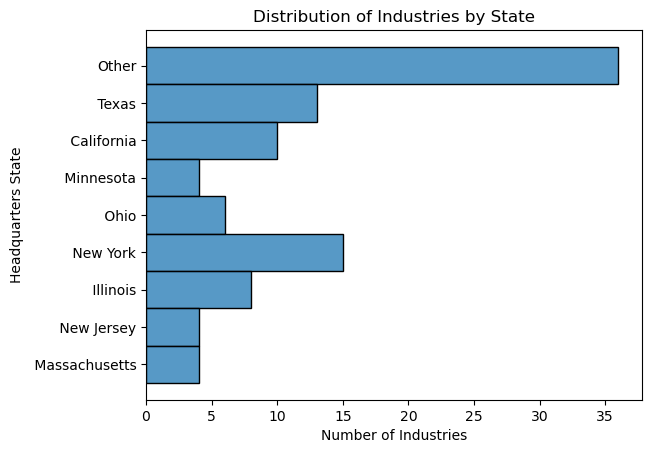

In [13]:
plt.title('Distribution of Industries by State')
sns.histplot(y=state)
plt.xlabel('Number of Industries')
plt.ylabel('Headquarters State')

<Axes: title={'center': 'Distribution of Number of Employees'}, xlabel='Employees'>

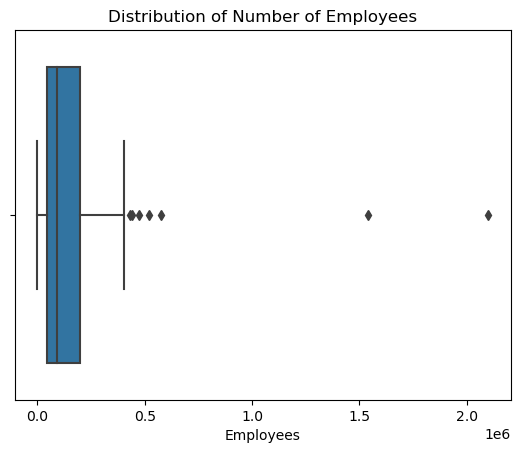

In [14]:
# Outliers are represented by small dots
plt.title('Distribution of Number of Employees')
sns.boxplot(x=df['Employees'])

<Axes: title={'center': 'Revenue growth distribution'}, xlabel='Revenue_growth(%)'>

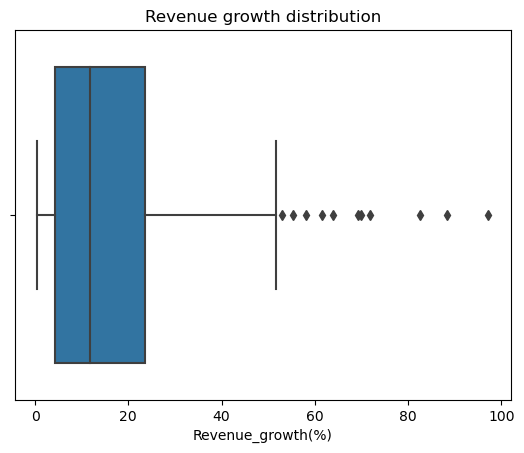

In [15]:
# Outliers are represented by small dots
plt.title('Revenue growth distribution')
sns.boxplot(x=df['Revenue_growth(%)'])

<Axes: title={'center': 'Revenue Distribution'}, xlabel='Revenue (USD billions)'>

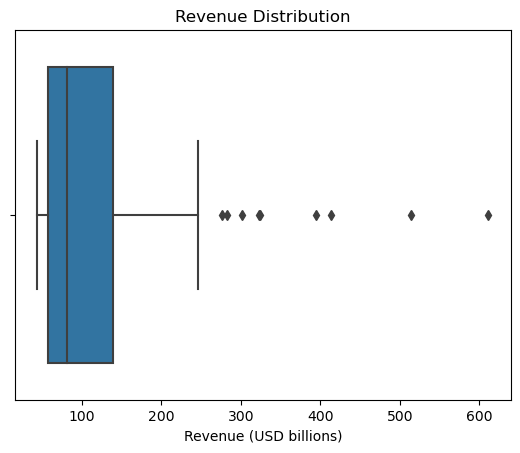

In [16]:
plt.title('Revenue Distribution')
sns.boxplot(x=df['Revenue (USD billions)'])

In [17]:
top10 = df['Industry'].value_counts().index[:10]
def generalize_top10(val):
    if val in top10:
        return val
    else:
        return 'Other'

In [18]:
industry = df['Industry'].apply(generalize_top10)

<Axes: title={'center': 'Industry Distribution'}, xlabel='Count', ylabel='Industry'>

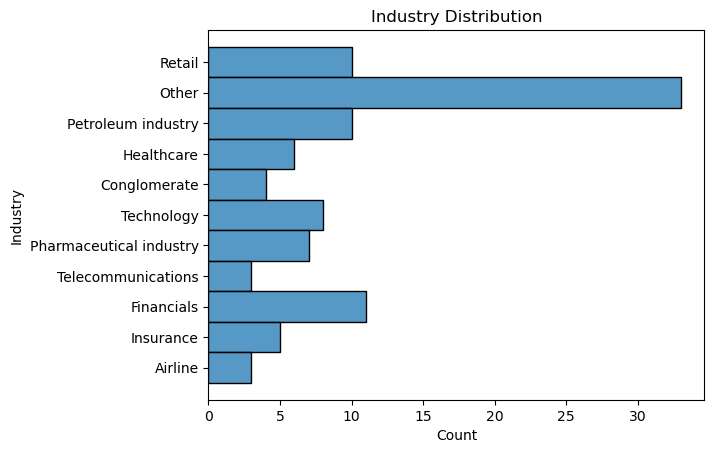

In [19]:
plt.title('Industry Distribution')
sns.histplot(y=industry)

/tmp/ipykernel_20/87062505.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: title={'center': 'Correlation'}>

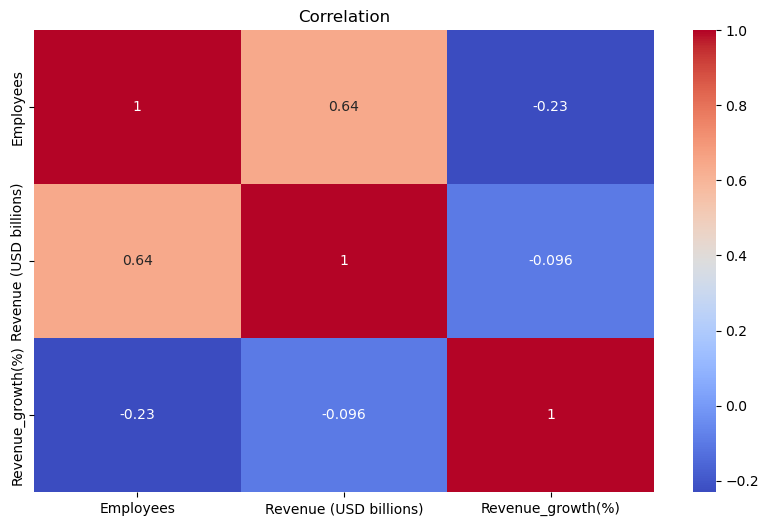

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,6))
plt.title('Correlation')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Text(0, 0.5, 'Number of Employees')

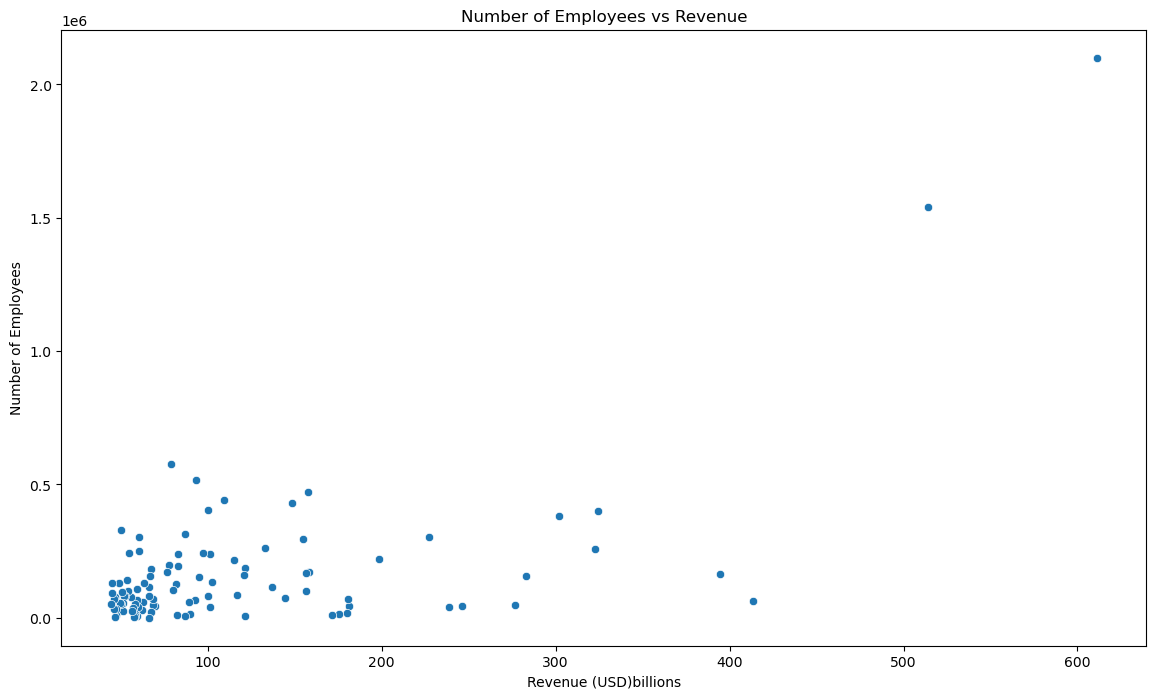

In [21]:
plt.figure(figsize=(14,8))
plt.title('Number of Employees vs Revenue')
sns.scatterplot(data=df, y='Employees', x='Revenue (USD billions)')
plt.xlabel('Revenue (USD)billions')
plt.ylabel('Number of Employees')

In [22]:
df['Industry'].replace({'Aerospace and defense': 'Aerospace and Defense'}, inplace =True)

Text(0.5, 0, 'Revenue (USD billions)')

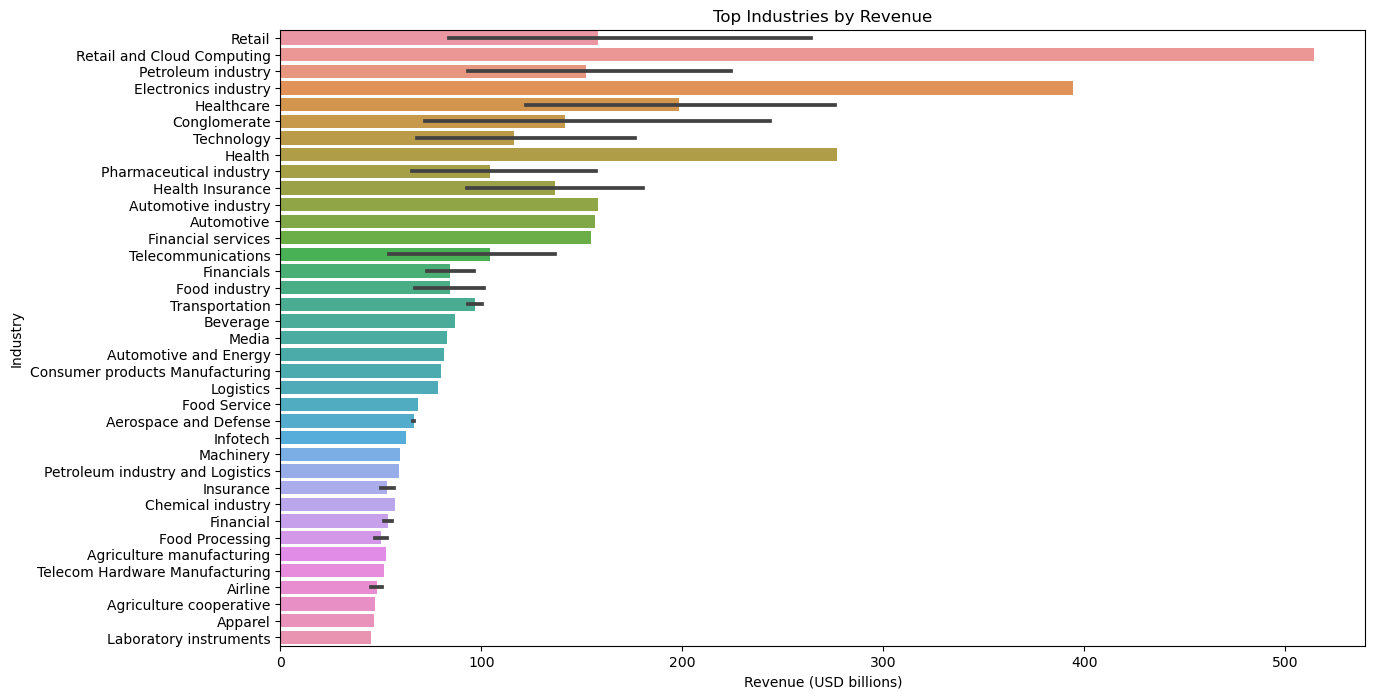

In [23]:
plt.figure(figsize=(14,8))
plt.title('Top Industries by Revenue')
sns.barplot(data=df, y='Industry', x='Revenue (USD billions)')
plt.ylabel('Industry')
plt.xlabel('Revenue (USD billions)')

Text(0.5, 0, 'Revenue(USD billions)')

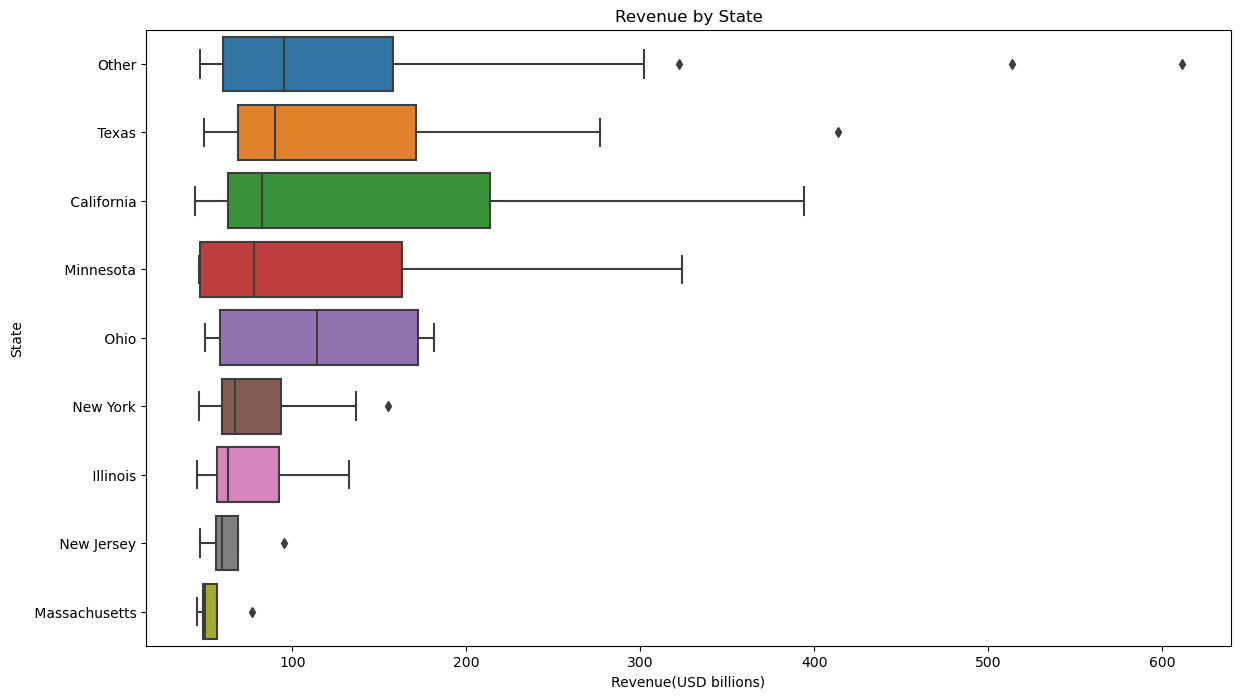

In [24]:
plt.figure(figsize=(14,8))
plt.title('Revenue by State')
sns.boxplot (y=state, x=df['Revenue (USD billions)'])
plt.ylabel('State')
plt.xlabel('Revenue(USD billions)')

There are likely many hidden insights in this dataset. However,data analysis is an
ongoing process, and I believe there's still more to uncover. I invite you to delve into the
data and contribute your insights to this notebook. Together, we can unlock the full 
potentials of the dataset and gain valuable knowledge from it.

Thank you for exploring this notebook! If you enjoyed it and found value in the content,
please consider giving it an upvote ⬆️. Your support means a lot to me and encourages me to create more helpful notebooks.